# Using InSegt for dictionary-based segmentation of nerves images

InSegt-py is a py version of [InSegt](https://github.com/vedranaa/InSegt). Basic variant of InSegt is described in our paper [Content-based Propagation of User Markings for Interactive Segmentation of Patterned Images](http://openaccess.thecvf.com/content_CVPRW_2020/papers/w57/Dahl_Content-Based_Propagation_of_User_Markings_for_Interactive_Segmentation_of_Patterned_CVPRW_2020_paper.pdf), CVPRW 2020. But InSegt has evolved, so please check the demos and notebooks for the updated version.

This is a example of interactive image segmentation with InSegt. Here we usa a model which builds dictionay by clustering image features in a k-means tree. For features we use Gaussian derivatives, where we use a few different values for the standard deviation of the Gaussian kernel. Furthermore, the model is made multi-scale by building and including sub-models operating on a downscaled version of the input image. 

In this example we use slices from volumetric images of peripheral nerves. The study of the data is described in the article [Three-dimensional architecture of human diabetic peripheral nerves revealed by X-ray phase contrast holographic nanotomography](https://www.nature.com/articles/s41598-020-64430-5?utm_source=other&utm_medium=other&utm_content=null&utm_campaign=JRCN_2_LW01_CN_SCIREP_article_paid_XMOL), Scientific Reports 2020.

## Import packages
Most importantly, you need `insegt` and `insegtpy.models`. You also need to be able to read in the image (for example using `scikit-image`), and show the result (for example using `matplotlib`).

In [1]:
import insegtpy
import insegtpy.models
import PIL
import numpy as np
import urllib.request  # for getting the image from data repository
import matplotlib.pyplot as plt

%matplotlib notebook

## Load the image 

Get the image from our data repository. Alternatively, load the image from your computer.

In [2]:
url = 'https://qim.compute.dtu.dk/data-repository/InSegt_data/2D/NT2_0001.png'
image0 = np.array(PIL.Image.open(urllib.request.urlopen(url)))

# # Check the path and load the image locally
# image0 = np.array(PIL.Image.open('../data/NT2_0001.png'))

print(f'Image size is {image0.shape}')
print(f'Image type is {image0.dtype}')

Image size is (1024, 1024)
Image type is uint8


## Build the model
For this model we use a km-tree with branching factor 25 and 3 layers. Gaussian features are computed using Gaussian kernels of four different standard deviatioons. 40000 feature vectors have been extracted to train the model. When propagating user labelings we use a 9x9 kernel. Finaly, for multiscale feature the model incudes a submodel build on a image resized with factor 0.5 and 0.25.

In [3]:
model = insegtpy.models.gauss_features_segmentor(image0, 
                                   branching_factor = 25, 
                                   number_layers = 3,
                                   number_training_vectors = 40000,
                                   features_sigma = [1,2,4,8], 
                                   propagation_size = 9, 
                                   scales = [1, 0.5, 0.25])

Number of images 1
Number of training patches 40000
Number of layers 3 number of elements 16275
Number of images 1
Number of training patches 40000
Number of layers 3 number of elements 16275
Number of images 1
Number of training patches 40000
Number of layers 3 number of elements 16275


Run InSegt on the image using the model. This will launch an InSegt window, where you may anotate the features of interest. We suggest that you fully anotate a small part of the image surounding one or two nerve cells. For on-screen help when using InSegt, hold ´H´. When you are sattisfied with the resulting segmentation, close InSegt window. You will be able to access the segmentation result via InSegt object.

In [4]:
ex = insegtpy.insegt(image0, model)

Starting InSegt Annotator. For help, hit 'H'.


## Test on another (similar) image

You can access the insegt segmentation result using InSegt object. You can also use the learned model to segment another similar image.

<IPython.core.display.Javascript object>


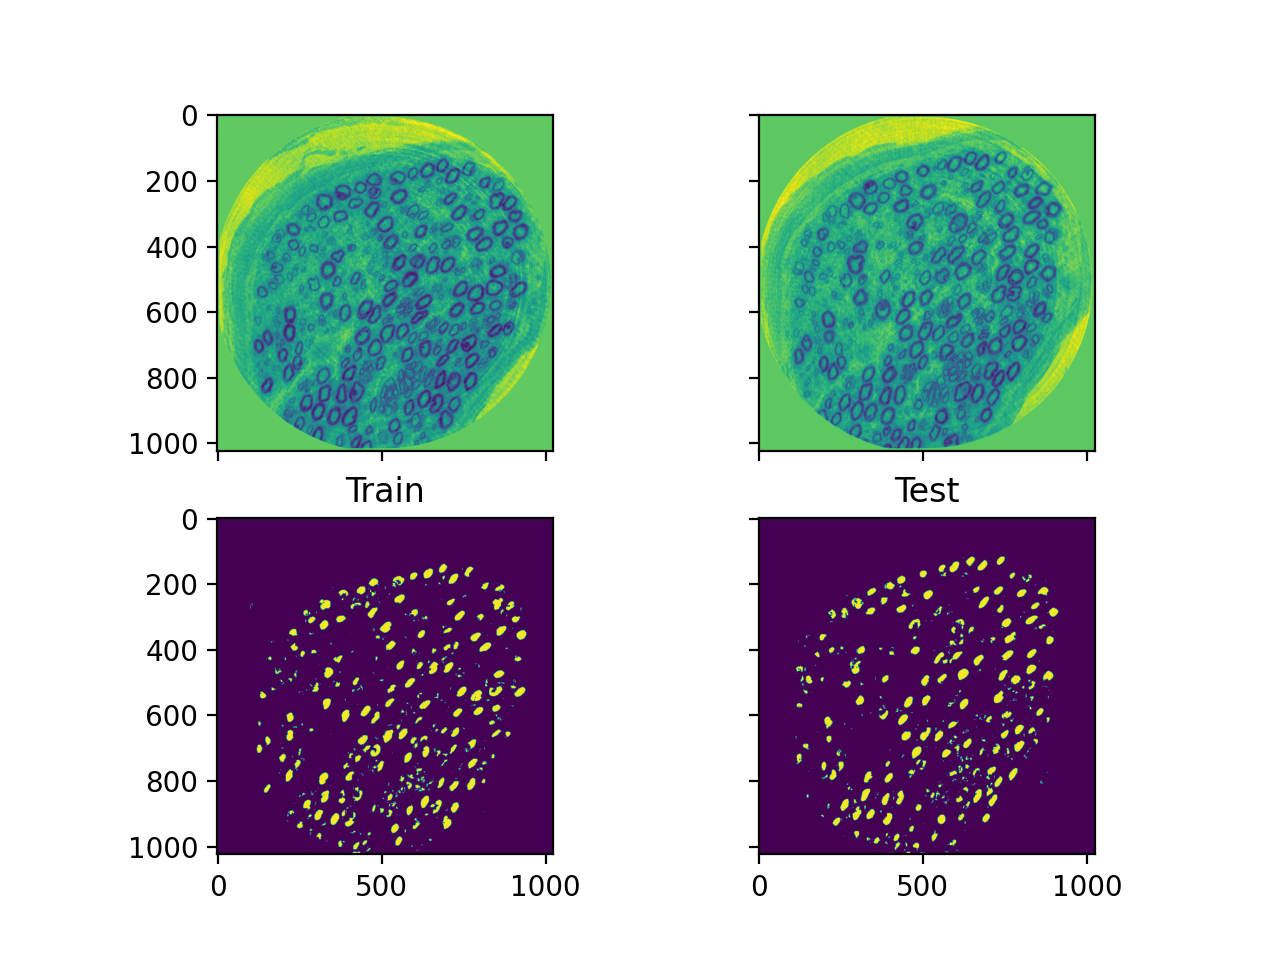

In [5]:
prob_image0 = ex.probabilities
seg_image0 = insegtpy.utils.segment_probabilities(prob_image0)

url = 'https://qim.compute.dtu.dk/data-repository/InSegt_data/2D/NT2_0512.png'
image1 = np.array(PIL.Image.open(urllib.request.urlopen(url)))

prob_image1 = model.new_image_to_prob(image1)
seg_image1 = insegtpy.utils.segment_probabilities(prob_image1)

fig, ax = plt.subplots(2, 2, sharex = True, sharey = True )
ax[0][0].imshow(image0)
ax[1][0].imshow(seg_image0)
ax[1][0].set_title('Train')
ax[0][1].imshow(image1)
ax[1][1].imshow(seg_image1)
ax[1][1].set_title('Test')
plt.show()